In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from datetime import datetime

### Figure 1 
#### Histogram of message number over users

In [5]:
user_postnum = pd.read_csv("message_num_user.csv",header = None)

In [8]:
user_postnum

0      1
0            1   1586
1           31  12461
2           41     11
3           51    237
4           61    108
5           62     85
6           71      9
7           81      4
8           91     53
9          111     88
10         131      7
11         141     57
12         151     48
13         161      1
14         171     52
15         193     55
16         201     45
17         221     19
18         231     54
19         241     27
20         251    134
21         261      1
22         271    140
23         281    102
24         291    417
25         292     61
26         301      5
27         341   8260
28         361   1140
29         371    115
...        ...    ...
146158  412263      1
146159  412268      5
146160  412270      9
146161  412272      5
146162  412274      2
146163  412284      1
146164  412285      1
146165  412296      1
146166  412298     19
146167  412299      2
146168  412300      1
146169  412303      1
146170  412306      1
146171  412309      1
146172  412310      1
146173  412312      1
146174  412313      1
146175  412321      3
146176  412323      1
146177  412334      1
146178  412340      1
146179  412342      3
146180  412344      1
146181  412350      1
146182  412351      1
146183  412356      2
146184  412362      2
146185  412363      5
146186  412371      2
146187  412374      1

[146188 rows x 2 columns]

In [17]:
from collections import OrderedDict
mes_stats = OrderedDict()
mes_stats['1-5'] = len([i for i in user_postnum[1] if (i>= 1) & (i <= 5)])
mes_stats['5-10'] = len([i for i in user_postnum[1] if (i>5) & (i <= 10)])
mes_stats['10-50'] = len([i for i in user_postnum[1] if (i> 10) & (i <= 50)])
mes_stats['50-100'] = len([i for i in user_postnum[1] if (i> 50) & (i <=100)])
mes_stats['100-500']=len([i for i in user_postnum[1] if (i> 100) & (i <= 500)])             
mes_stats['500-1k'] = len([i for i in user_postnum[1] if (i> 500)&(i<=1000)])
mes_stats['1k-5k'] = len([i for i in user_postnum[1] if (i> 1000) & (i <= 5000)])
mes_stats['5k-10k']=len([i for i in user_postnum[1] if (i> 5000) & (i <= 10000)])
mes_stats['>10k'] = len([i for i in user_postnum[1] if i> 10000])

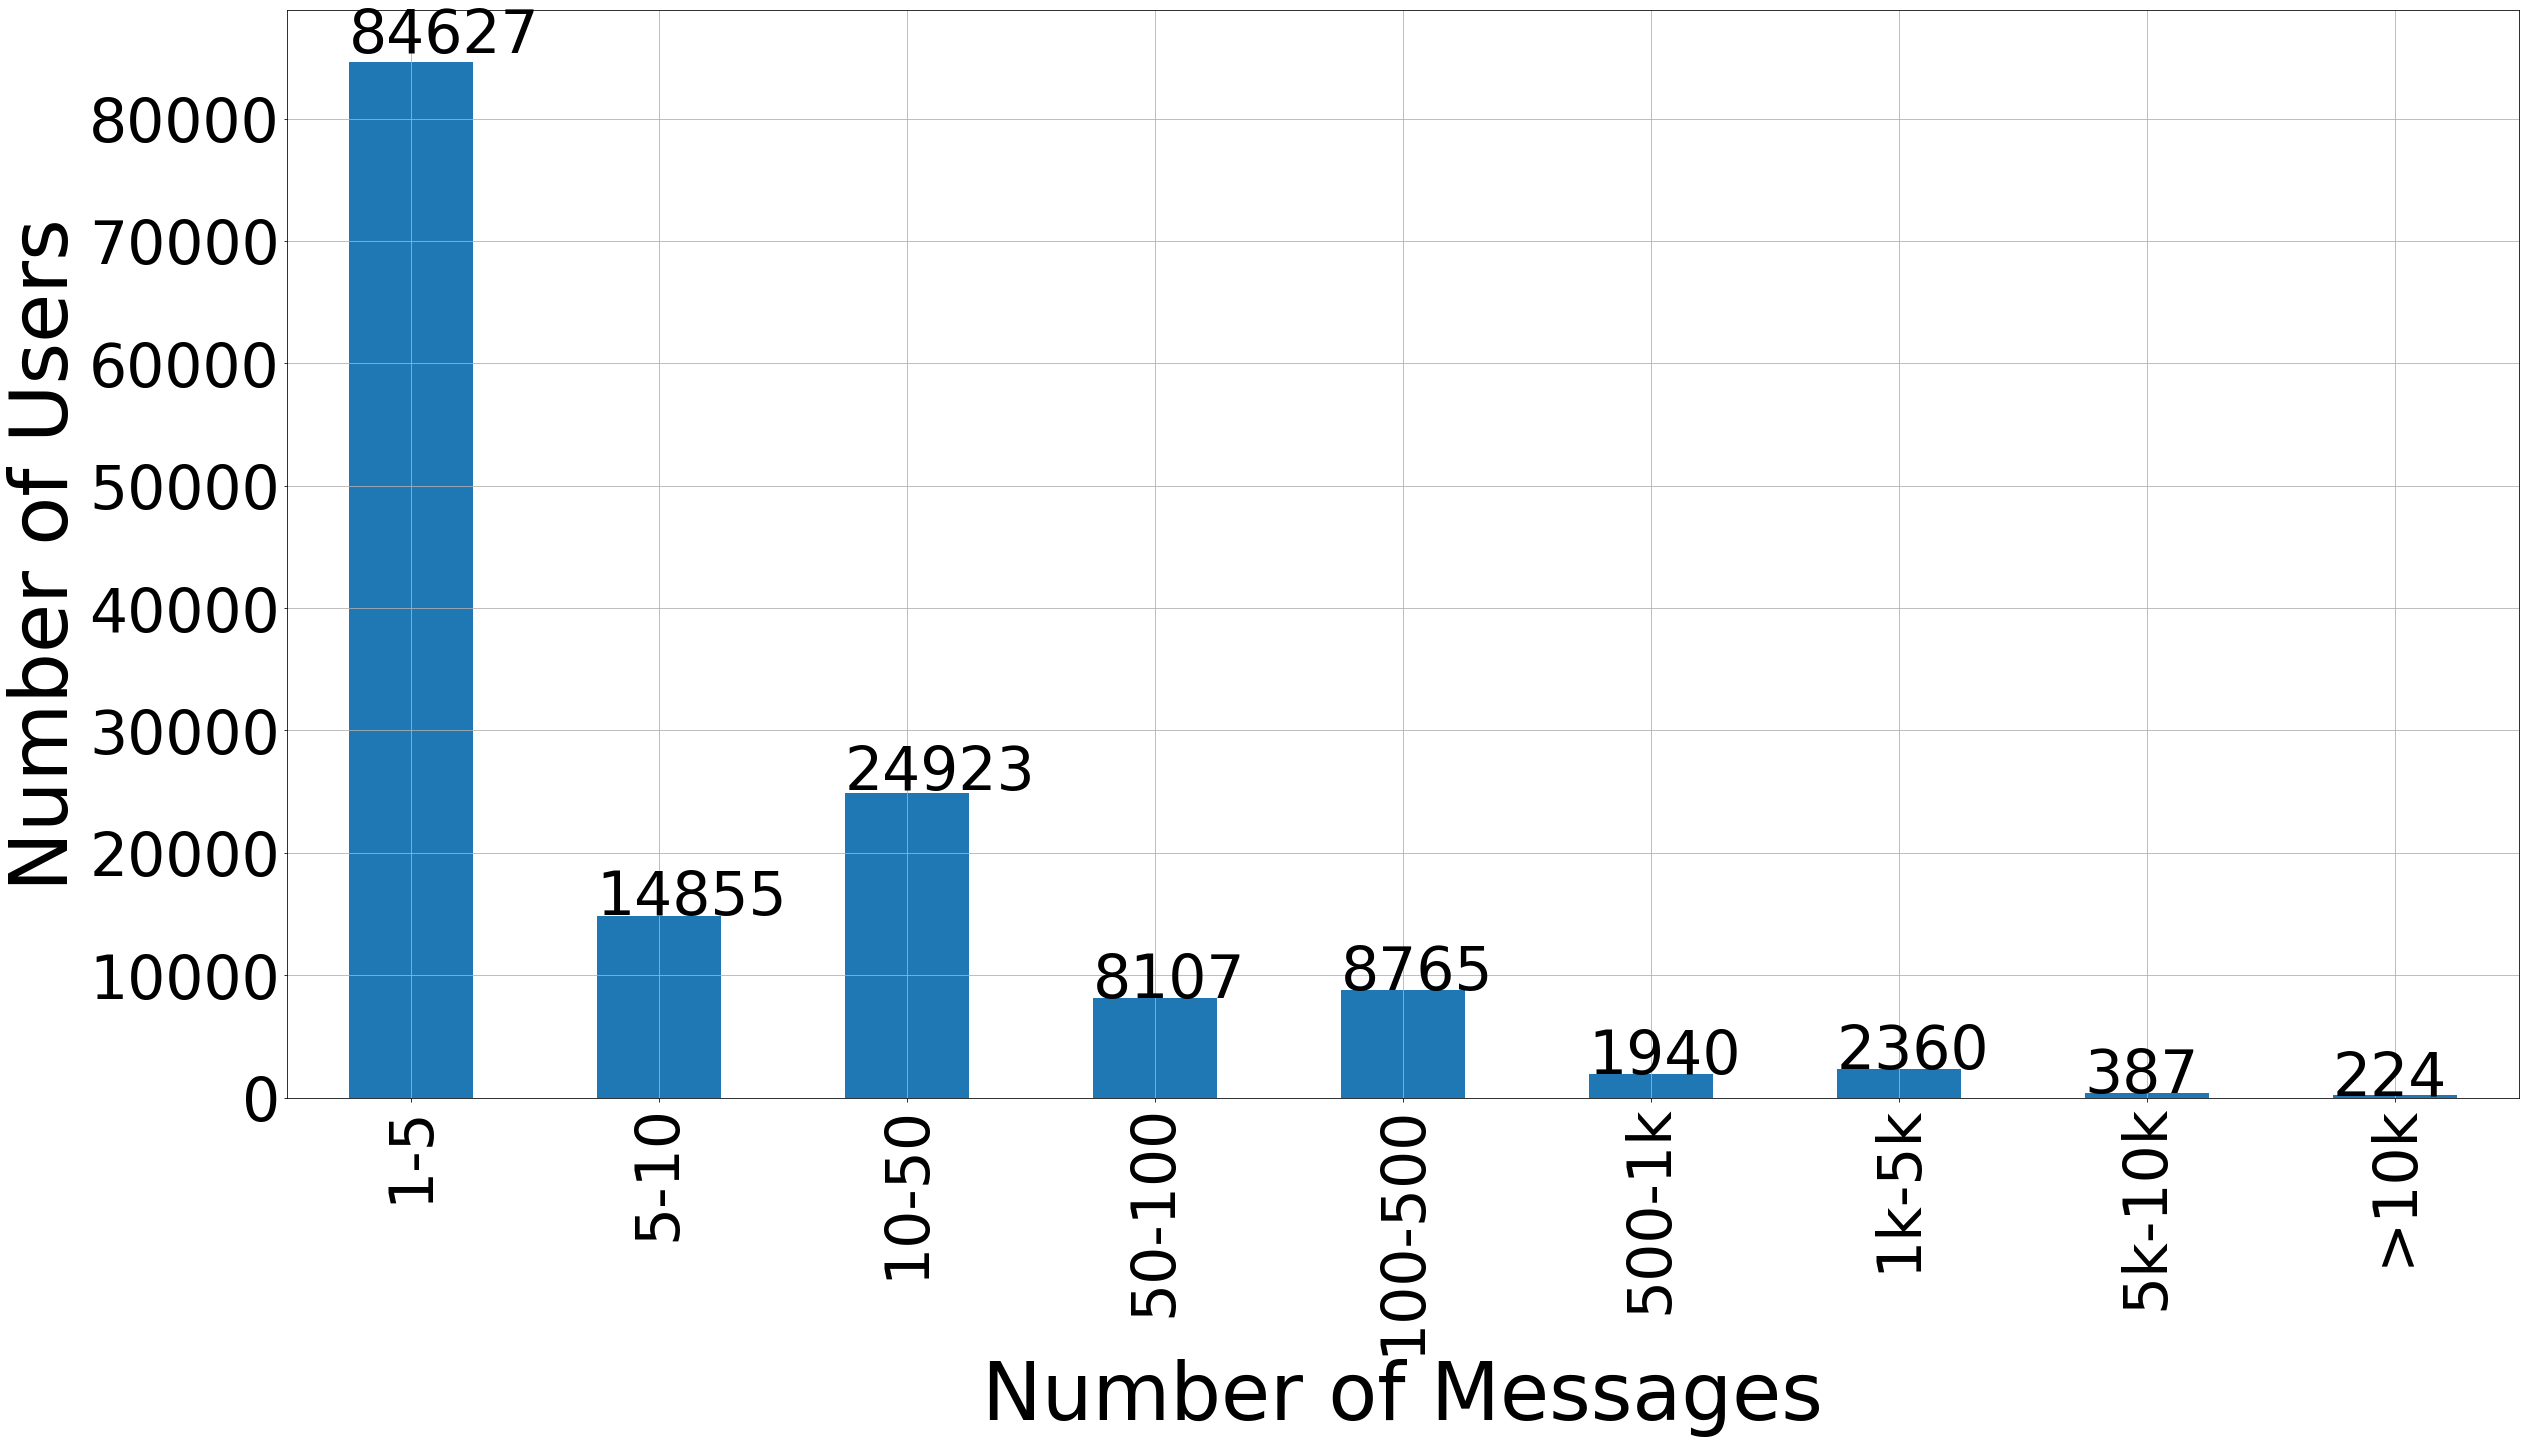

In [29]:
#draw 'post_num vs user' histogram
df = pd.DataFrame.from_dict(mes_stats,orient='index')
ax = df.plot(kind='bar',legend = False, grid = True,figsize= (40,20),fontsize = 60)
for p in ax.patches:
    ax.annotate(str(p.get_height())[:-2], (p.get_x(), p.get_height() * 1.009),fontsize = 60)
ax.set_xlabel("Number of Messages",fontsize= 80)
ax.set_ylabel("Number of Users",fontsize = 80)
plt.savefig('user_vs_messages.png',bbox_inches = 'tight')
plt.show()

### Figure 2
#### cumulative number of users & cumulative number of messages vs date 

In [71]:
#read 'cumulative user vs date' data
cumulative_user = pd.read_csv('cumluser_day.csv',header = None)
cumulative_user.columns = ['date','value']
cumulative_user['date'] = pd.to_datetime(cumulative_user['date'])

In [77]:
#add one column of weekday
weekday_list = list()
for i in cumulative_user['date']:
    weekday_list.append(datetime.date(i).weekday())
cumulative_user['weekday'] = weekday_list

In [83]:
#new datafram just keep one day in every week
weekly_cum_user = cumulative_user[cumulative_user['weekday'] == 6].drop('weekday', axis = 1)
weekly_cum_user.set_index(weekly_cum_user["date"],inplace=True)

In [104]:
weekly_cum_user

date   value
date                         
2016-08-14 2016-08-14      27
2016-08-21 2016-08-21     445
2016-08-28 2016-08-28    2310
2016-09-04 2016-09-04    3920
2016-09-11 2016-09-11    5441
2016-09-18 2016-09-18    6960
2016-09-25 2016-09-25    8417
2016-10-02 2016-10-02    9649
2016-10-09 2016-10-09   11445
2016-10-16 2016-10-16   13715
2016-10-23 2016-10-23   15969
2016-10-30 2016-10-30   17079
2016-11-06 2016-11-06   18589
2016-11-13 2016-11-13   20673
2016-11-20 2016-11-20   26081
2016-11-27 2016-11-27   34610
2016-12-04 2016-12-04   38543
2016-12-11 2016-12-11   43731
2016-12-18 2016-12-18   45989
2016-12-25 2016-12-25   46720
2017-01-01 2017-01-01   47459
2017-01-08 2017-01-08   49022
2017-01-15 2017-01-15   49929
2017-01-22 2017-01-22   50483
2017-01-29 2017-01-29   51039
2017-02-05 2017-02-05   52029
2017-02-12 2017-02-12   53386
2017-02-19 2017-02-19   54061
2017-02-26 2017-02-26   55105
2017-03-05 2017-03-05   56022
...               ...     ...
2017-07-30 2017-07-30   74708
2017-08-06 2017-08-06   75617
2017-08-13 2017-08-13   77568
2017-08-20 2017-08-20   82738
2017-08-27 2017-08-27   86565
2017-09-03 2017-09-03   89384
2017-09-10 2017-09-10   93979
2017-09-17 2017-09-17   95746
2017-09-24 2017-09-24   97604
2017-10-01 2017-10-01   98659
2017-10-08 2017-10-08   99647
2017-10-15 2017-10-15  100626
2017-10-22 2017-10-22  101786
2017-10-29 2017-10-29  103168
2017-11-05 2017-11-05  105035
2017-11-12 2017-11-12  106272
2017-11-19 2017-11-19  108452
2017-11-26 2017-11-26  112492
2017-12-03 2017-12-03  114709
2017-12-10 2017-12-10  116157
2017-12-17 2017-12-17  119348
2017-12-24 2017-12-24  127641
2017-12-31 2017-12-31  130267
2018-01-07 2018-01-07  132146
2018-01-14 2018-01-14  135820
2018-01-21 2018-01-21  138222
2018-01-28 2018-01-28  139958
2018-02-04 2018-02-04  141619
2018-02-11 2018-02-11  142878
2018-02-18 2018-02-18  144384

[80 rows x 2 columns]

In [85]:
#read daily message number data
daily_message = pd.read_csv('message_num_day.csv')
#calculate cumsum to get cumulative number
daily_message['cum_Value'] = daily_message['Value'].cumsum(axis = 0)
daily_message['Date'] = pd.to_datetime(daily_message['Date'])

In [86]:
#add one column of weekdays for all the dates
weekday_list = list()
for i in daily_message['Date']:
    weekday_list.append(datetime.date(i).weekday())
daily_message['weekday'] = weekday_list

In [88]:
#new dataframe just keep one day in each week
week_cum_message = daily_message[daily_message['weekday'] ==6].drop('weekday',axis = 1)

In [89]:
week_cum_message

Date  Value  cum_Value
4   2016-08-14     27         94
11  2016-08-21   3703      10252
18  2016-08-28   9448      59439
25  2016-09-04  11109     134578
32  2016-09-11  10946     207995
39  2016-09-18   9741     282208
46  2016-09-25   9495     358993
53  2016-10-02   8574     432918
60  2016-10-09  14384     521551
67  2016-10-16  14831     635249
74  2016-10-23  13773     758915
81  2016-10-30  15429     876340
88  2016-11-06  14532     989506
95  2016-11-13  15077    1129311
102 2016-11-20  25940    1282088
109 2016-11-27  30598    1513426
116 2016-12-04  29407    1749644
123 2016-12-11  36880    2000254
130 2016-12-18  26707    2223542
137 2016-12-25  15658    2405109
144 2017-01-01  23330    2590626
151 2017-01-08  28091    2798323
158 2017-01-15  27244    3004801
165 2017-01-22  29831    3219194
172 2017-01-29  27589    3420712
179 2017-02-05  26121    3626382
186 2017-02-12  24656    3821189
193 2017-02-19  24847    4010444
200 2017-02-26  23405    4199207
207 2017-03-05  22788    4380764
..         ...    ...        ...
354 2017-07-30  22592    7896622
361 2017-08-06  22226    8062284
368 2017-08-13  25970    8249162
375 2017-08-20  30023    8497267
382 2017-08-27  31204    8747889
389 2017-09-03  33616    8994075
396 2017-09-10  39864    9295027
403 2017-09-17  33807    9558952
410 2017-09-24  34643    9808530
417 2017-10-01  31576   10055552
424 2017-10-08  29700   10300817
431 2017-10-15  31398   10542741
438 2017-10-22  30513   10780355
445 2017-10-29  30189   11013068
452 2017-11-05  35872   11272911
459 2017-11-12  32970   11524924
466 2017-11-19  41259   11796158
473 2017-11-26  44706   12114187
480 2017-12-03  43840   12466618
487 2017-12-10  43124   12798668
494 2017-12-17  43689   13132313
501 2017-12-24  44193   13537792
508 2017-12-31  47574   13854375
515 2018-01-07  47531   14199989
522 2018-01-14  56771   14602911
529 2018-01-21  53823   15011359
536 2018-01-28  50492   15400760
543 2018-02-04  53216   15802213
550 2018-02-11  47226   16172806
557 2018-02-18  48452   16539306

[80 rows x 3 columns]

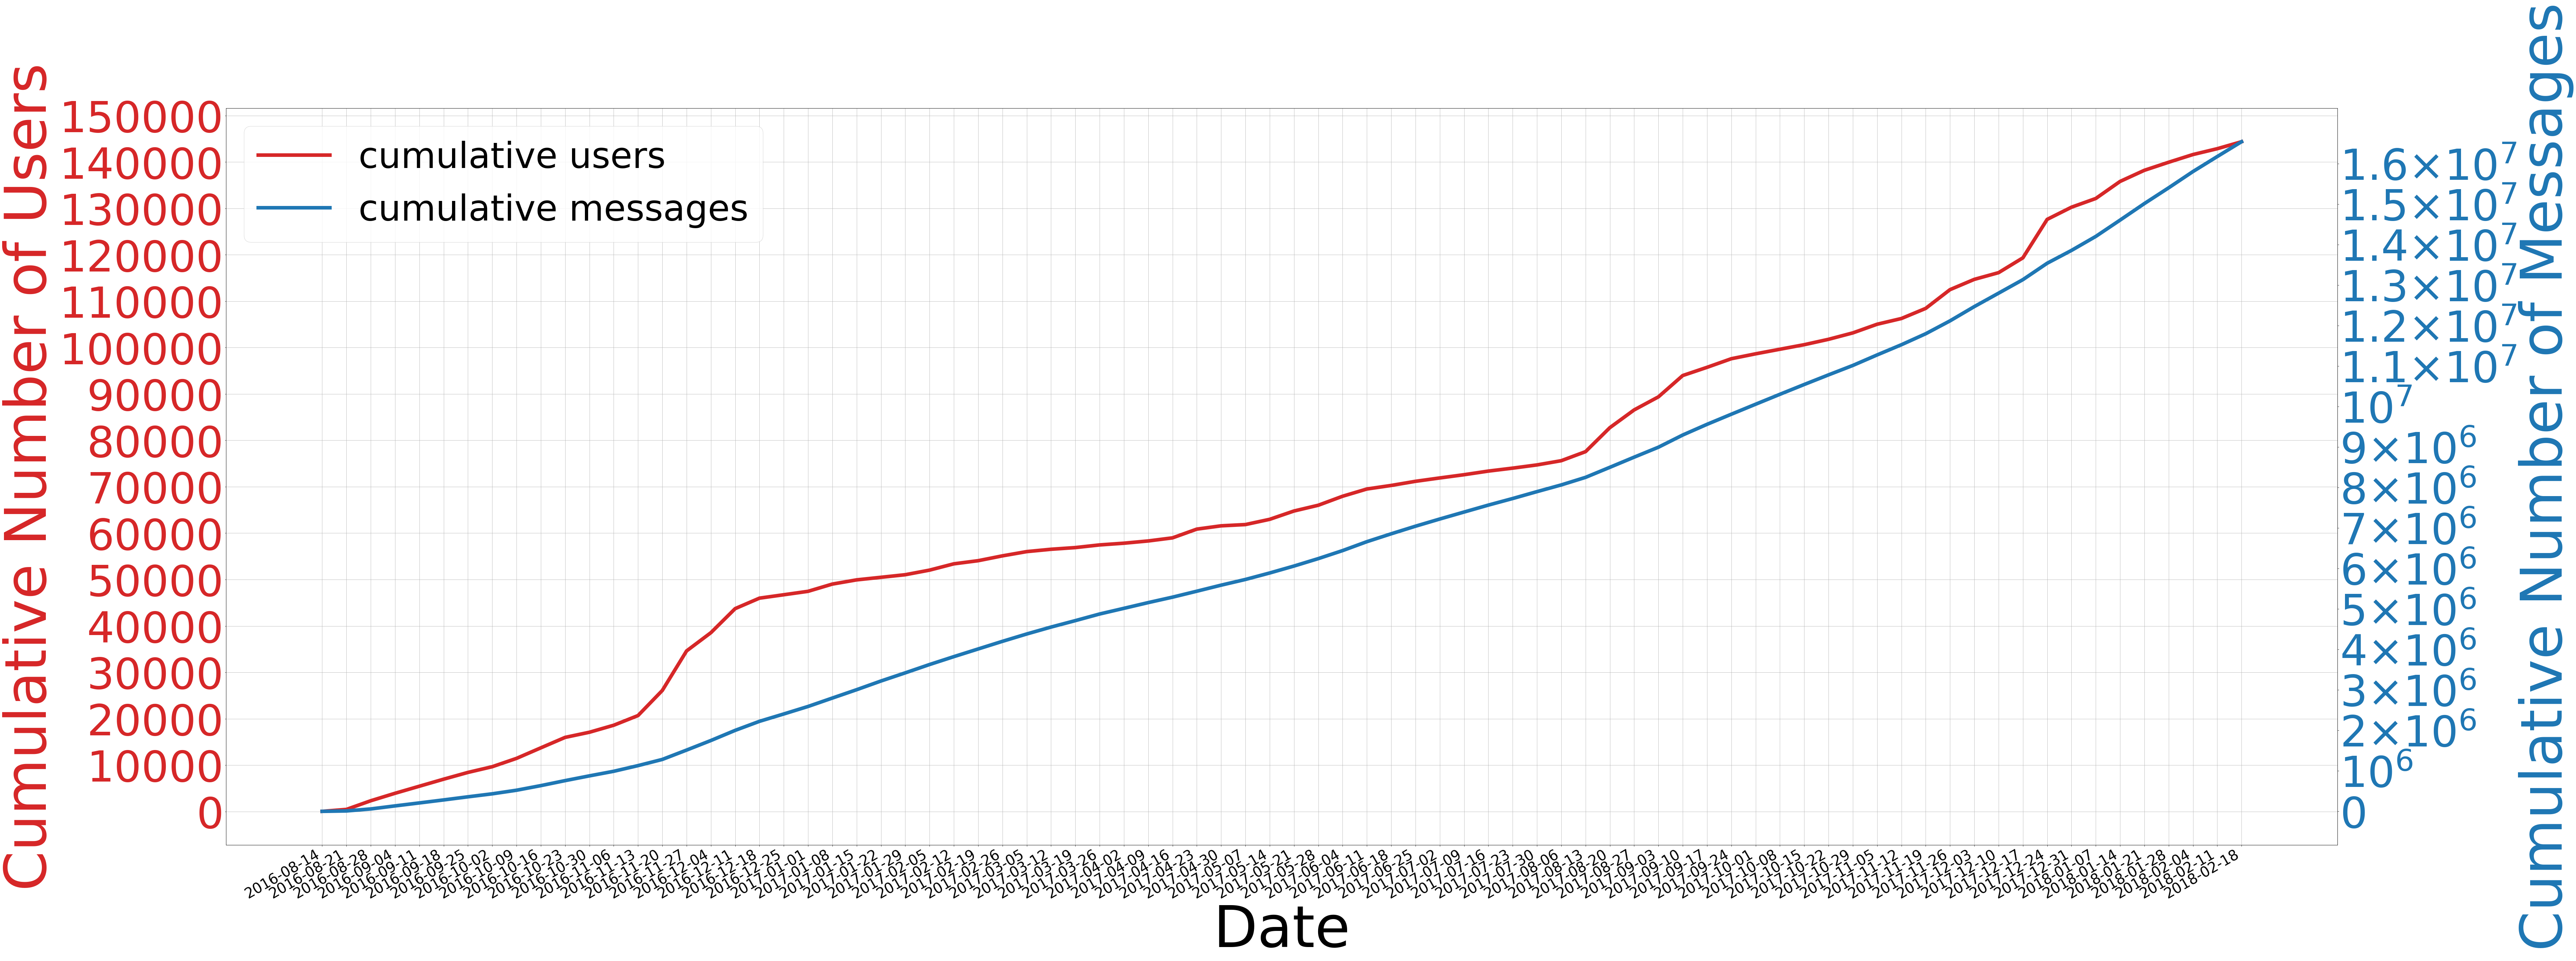

In [136]:
from matplotlib import dates
import matplotlib.ticker as mticker

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 100
fig_size[1] = 40
plt.rcParams["figure.figsize"] = fig_size

#axis 1: cumulative users
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xticks(weekly_cum_user.index.to_pydatetime())
ax1.set_yticks(np.arange(0, 170000, 10000))
dfmt = dates.DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(dfmt)

ax1.set_xlabel('Date',fontsize = 160)
ax1.set_ylabel('Cumulative Number of Users', fontsize = 160,color=color)
lns1 = ax1.plot(weekly_cum_user['date'], weekly_cum_user['value'], linewidth= 10.0,color=color)
ax1.tick_params(axis='y',labelsize = 120,labelcolor = color)
ax1.tick_params(axis='x',labelsize = 40)
ax1.grid(True)

#axis 2: cumulative messages
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'

ax2.set_yticks(np.arange(0, 17000000, 1000000))
ax2.ticklabel_format(style='sci', axis='y',scilimits=(0,0),fontsize = 120)

#make scientific notation for y axis, since the ticks are too large
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(g))

ax2.set_ylabel('Cumulative Number of Messages', fontsize = 160,color=color)
lns2 = ax2.plot(week_cum_message['Date'], week_cum_message['cum_Value'], linewidth= 10.0,color=color)
ax2.tick_params(axis='both',labelsize = 120,labelcolor = color)
ax2.tick_params(axis='both',labelsize = 120,labelcolor = color)
#ax2.grid(True)

#add legend
lns = lns1+lns2
labs = ['cumulative users', 'cumulative messages']
plt.legend(lns, labs, loc=0,fontsize = 100)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.gcf().autofmt_xdate()
plt.savefig('cum_user_post.png',bbox_inches = 'tight')  
plt.show()